# Linear Kernal Support Vector Regression
it is invented by Vladimir Vapnik in 90s bell labs.

In SVR, the linear line in the plot is surrounded by a insensitive tube.the datapoints inside that tube is insenitive where as outside it is sensitive.

ε: distance between border of the tube and line

ξ: distance between datapoint outside tube to border of the tube.(sensitive)

<img

it is called SVR, because all the data points are vectors.datapoints outside tube ξn are support vectors because they dictate/support the formation of the tube.

Rosource: Efficent Learing Machines Book by Mariette Awad & Rahul Khanna

https://data-flair.training/blogs/svm-kernel-functions/


In [15]:
#Predict the previous salary of the candidate using previous company salary data from glassdoor.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import Dataset

In [16]:
# Position,Level,Salary
dataset=pd.read_csv('https://raw.githubusercontent.com/ProgramSKAN/Sample-Data-For-Machine-Learning/master/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values #level
y=dataset.iloc[:,-1].values #salary

In [17]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [18]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [19]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


We won't split the whole dataset into a training set in a test because we want to leverage the maximum data to learn these correlations between those position levels and the salaries.

### Feature Scaling

we have to apply feature scaling beacause in SVR model there is no explicit equation of the dependent variable with respect to the features.And mostly there are not those coefficients multiplying each of the features and therefore not compensating with lower values for the features taking high values.

SVR has an implicit equation for dependent variable wrt featuers.so since SVR don't have such coefficient like simple/multiple/polynomial regression.so apply feature scaling.

In [34]:
from sklearn.preprocessing import StandardScaler #scale between 0 & 1 #this class expects 2D array.so reshape properly
sc_X=StandardScaler() 
sc_y=StandardScaler() 
X=sc_X.fit_transform(X) #we don't fit same StandardScaler() for both X & y because mean & std dev will be diff for level and salary columns.
y=sc_y.fit_transform(y) #feature scaling should also be applied to y because salary is large number that level column.in previous models we didn't applied for y because there y is 0/1
# if feature scaling not applied then it won't work since salary value is way higher than level column

In [21]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [22]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

In [35]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #Gaussian Radial Basis function.https://data-flair.training/blogs/svm-kernel-functions/
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

In [25]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

### Visualising the SVR results

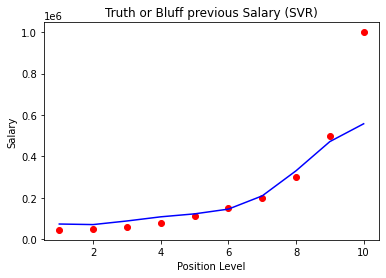

In [28]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff previous Salary (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the SVR results (for higher resolution and smoother curve)

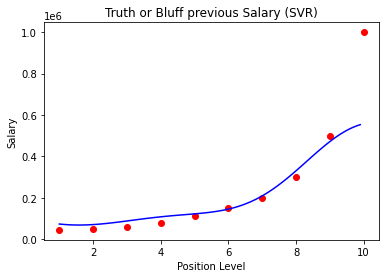

In [29]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff previous Salary (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

from above SVR better fit with the non linear curve.Results are close to the real salary except that SVR wont catch outlier.

SVR is good for both linear and non linear model.we can choose linear kernel.or we can choose non linear/polynomial kernel like above example.